In [1]:
# import Requried library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [3]:
df = pd.read_csv("diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


We Drop the column [x,y,z] Bcz  Highly Correlated With the "Carat" column Which Represents The Weight of The Diamonds.....

In [6]:
# drop x,y,z
cdp = ['x','y','z']
df = df.drop(cdp, axis=1)
df

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757
49996,0.72,Good,D,SI1,63.1,55.0,2757
49997,0.70,Very Good,D,SI1,62.8,60.0,2757
49998,0.86,Premium,H,SI2,61.0,58.0,2757


# Univariate and Bivariate Analaysis

Q1) How does the carat weight of a diamond relate to its price?

In [7]:
# Calculate the correlation coefficient
correlation = df['carat'].corr(df['price'])

# Print the correlation coefficient
print("Correlation coefficient between carat and price:", correlation)

Correlation coefficient between carat and price: 0.9218037353151024


This is positive correlation bcz carat Weight will Incressing price will Be Incressing....

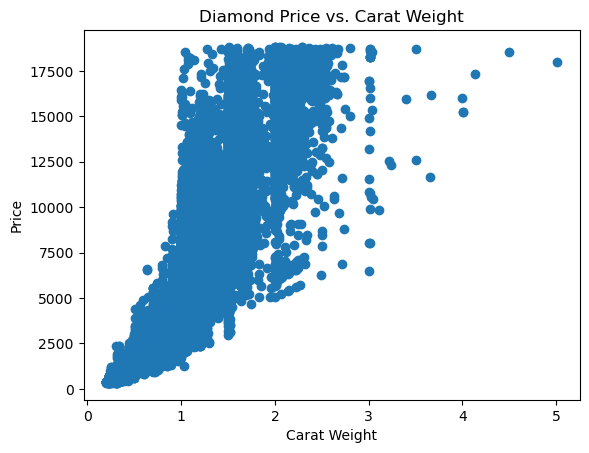

In [8]:
# Create a scatter plot
plt.scatter(df['carat'], df['price'])
plt.xlabel('Carat Weight')
plt.ylabel('Price')
plt.title('Diamond Price vs. Carat Weight')

# Display the plot
plt.show()

Q2) Are Certain Cuts of Diamonds More Expensive Than Others on Average?

In [9]:
# Calculate average price by cut
average_price_by_cut = df.groupby('cut')['price'].mean()

# Print the average price by cut
print(average_price_by_cut)

cut
Fair         4329.705017
Good         3961.470266
Ideal        3463.090230
Premium      4607.382867
Very Good    3986.585594
Name: price, dtype: float64


Premium Cutting Diamonds Are Most Expansive in this Dataset.....  

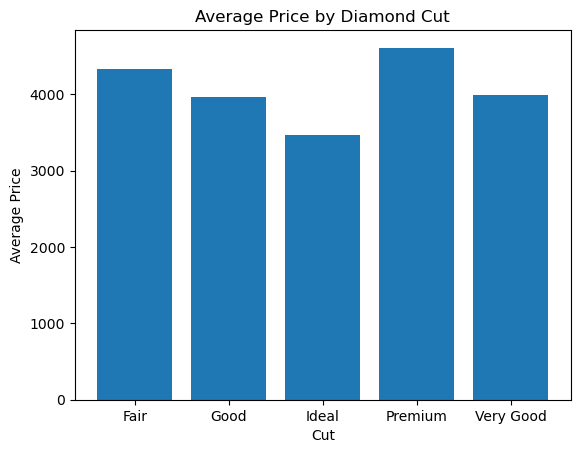

In [10]:
# Create a bar plot
plt.bar(average_price_by_cut.index, average_price_by_cut.values)
plt.xlabel('Cut')
plt.ylabel('Average Price')
plt.title('Average Price by Diamond Cut')

# Display the plot
plt.show()

Q3) What there any significant difference in diamond prices based on their color?

In [11]:
from scipy.stats import ttest_rel
from scipy import stats
# Select two color groups to compare (e.g., 'E' and 'F')
color_group1 = df[df['color'] == 'E']['price']
color_group2 = df[df['color'] == 'F']['price']

# Perform an independent t-test to compare the mean prices of the two color groups
t_statistic, p_value = stats.ttest_ind(color_group1, color_group2)

In [12]:
t_statistic, p_value

# Define the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant difference in diamond prices between color groups E and F.")
else:
    print("There is no significant difference in diamond prices between color groups E and F.")

There is a significant difference in diamond prices between color groups E and F.


1.7e-34 < 0.05 p value is lessthan 0.05 so we are Reject null hypothesis and accept allternative hypothesis this is similarity b/w Diamond price and Color.....


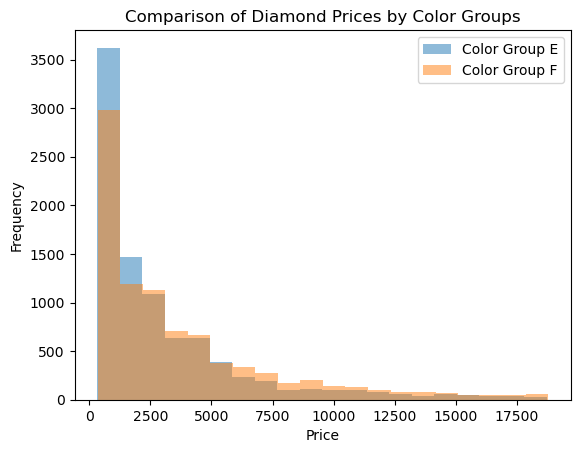

In [13]:
 # Create histograms for each color group
plt.hist(color_group1, bins=20, alpha=0.5, label='Color Group E')
plt.hist(color_group2, bins=20, alpha=0.5, label='Color Group F')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Comparison of Diamond Prices by Color Groups')
plt.legend()
plt.show()

Q4) Which features have the most significant impact on the price of a diamond?

price    1.000000
carat    0.921804
table    0.129848
depth   -0.012731
Name: price, dtype: float64


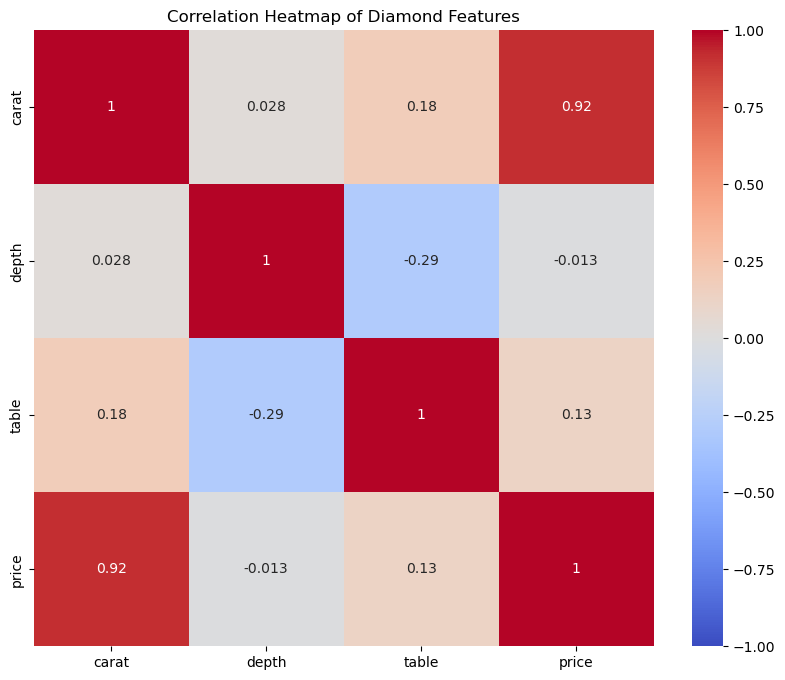

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Sort the correlations with respect to the price
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)

# Print the features with the highest correlation to the price
print(correlation_with_price)

# Generate a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Diamond Features')
plt.show()

carat coloumn are most significant impact on the price of a diamond.......


Q5) What is the probability Denity Funtion of price range from 5000 to 10000 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


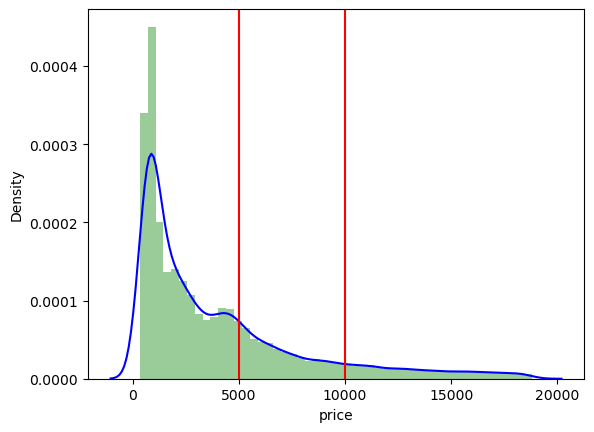

In [15]:
from scipy.stats import norm

def get_pdf_probability(df, startrange, endrange):
    # Filter out non-numeric values in the dataset
    filtered_data = pd.to_numeric(df, errors='coerce').dropna()

    # Plot the probability density function
    ax = sns.distplot(filtered_data, kde=True, kde_kws={'color': 'blue'}, color='green')
    plt.axvline(startrange, color='red')
    plt.axvline(endrange, color='red')
    plt.show()

# Select the 'price' column from the dataset
price_column = df['price']

# Call the function to plot the PDF within a specific range
get_pdf_probability(price_column, 5000, 10000)

Q6) Are there any specific combinations of cut, color, and clarity that result in higher-priced diamonds?

In [22]:
# Group the diamonds based on cut, color, and clarity
grouped_data = df.groupby(['cut', 'color', 'clarity'])

# Calculate the average price for each combination
average_prices = grouped_data['price'].mean().reset_index()

# Sort the combinations by average price in descending order
sorted_combinations = average_prices.sort_values(by='price', ascending=False)

# Print the top combinations with higher average prices
top_combinations = sorted_combinations.head(10)
print("Top Combinations with Higher Average Prices:")
print(top_combinations)

Top Combinations with Higher Average Prices:
           cut color clarity         price
53        Good     D      IF  10981.166667
221  Very Good     D      IF  10889.619048
156      Ideal     J      I1   9454.000000
165    Premium     D      IF   9056.500000
215    Premium     J     SI2   7714.006711
0         Fair     D      I1   7383.000000
209    Premium     I     VS2   7245.412162
207    Premium     I     SI2   7213.780822
151      Ideal     I     SI2   7213.261538
95        Good     I     SI2   7136.184211


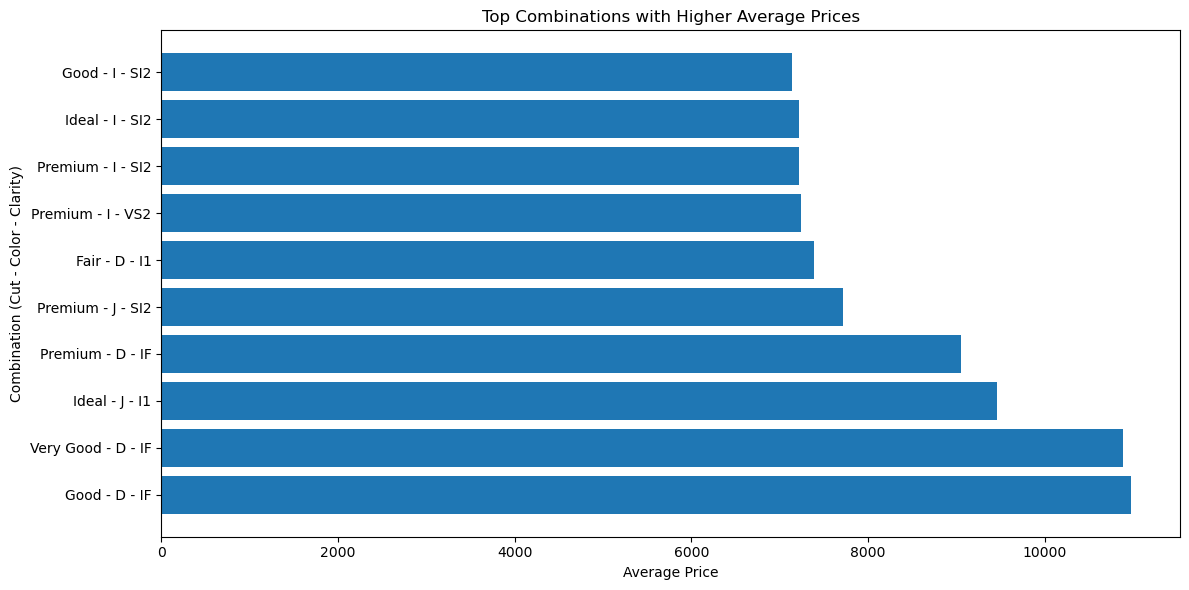

In [23]:
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_combinations)), top_combinations['price'], tick_label=top_combinations['cut'] + ' - ' + top_combinations['color'] + ' - ' + top_combinations['clarity'])
plt.xlabel('Average Price')
plt.ylabel('Combination (Cut - Color - Clarity)')
plt.title('Top Combinations with Higher Average Prices')
plt.tight_layout()

# Show the plot
plt.show()

Very Good - D - IF , Good - D - IF This Combinations Are higher-priced diamonds.....